![example](images/director_shot.jpeg)

# Project Title

**Authors:** Harmandip Singh 
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [7]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# Here you run your code to explore the data
title_basics=pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_basics.head(4)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"


In [9]:
title_basics.shape

(146144, 6)

In [10]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
title_ratings=pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
title_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [12]:
title_ratings.shape

(73856, 3)

In [13]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [29]:
df_combined=pd.merge(title_basics,title_ratings, on='tconst')
df_combined.head(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [44]:
df_combined['genres']=df_combined['genres'].str.split(',')

In [49]:
df_combined=df_combined.explode('genres')
df_combined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


In [50]:
df_combined.drop('genres', axis=1).join(df_combined['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Genres'))
Out[3]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"


In [51]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129294 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           129294 non-null  object 
 1   primary_title    129294 non-null  object 
 2   original_title   129294 non-null  object 
 3   start_year       129294 non-null  int64  
 4   runtime_minutes  118953 non-null  float64
 5   genres           128490 non-null  object 
 6   averagerating    129294 non-null  float64
 7   numvotes         129294 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 11.4+ MB


In [52]:
df_combined.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,129294.000000,118953.000000,129294.000000,1.292940e+05
mean,2014.218371,95.045640,6.303352,5.304729e+03
std,2.579059,156.455116,1.458034,3.797311e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,82.000000,5.400000,1.600000e+01
50%,2014.000000,92.000000,6.400000,6.400000e+01
75%,2016.000000,105.000000,7.300000,4.230000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [53]:
df_combined.shape

(129294, 8)

In [54]:
df_combined.rename(columns={"primary_title":"title"},inplace=True)
df_combined.head(2)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77


In [55]:
movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [56]:
movie_gross.shape

(3387, 5)

In [23]:
df_another=pd.merge(df_combined,movie_gross, on='title')
df_another.head(20)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
7,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,124800000,2015
8,tt3079380,Spy,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,124800000,2015
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000,2011


In [103]:
df_another.shape

(3027, 12)

In [57]:
counts = df_combined['genres'].value_counts()
high_counts = counts[counts >= 200]

<ipython-input-58-02e944c71211>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=high_counts.index, rotation=80);


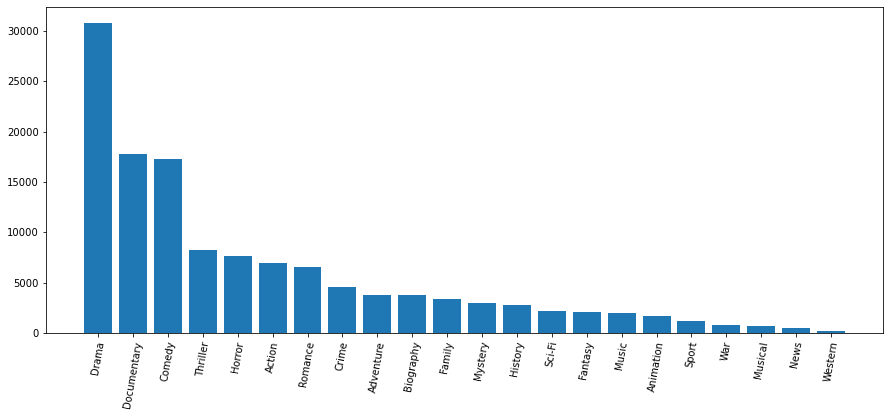

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=high_counts.index, height=high_counts)
ax.set_xticklabels(labels=high_counts.index, rotation=80);

In [56]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [65]:
movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [61]:
df_clean = df_combined.dropna(   
                                axis=0, 
                                subset=['runtime_minutes']
)
df_clean['runtime_minutes'].tail()

73849    130.0
73850     86.0
73851     75.0
73852     98.0
73855     72.0
Name: runtime_minutes, dtype: float64

In [117]:
low_length=df_combined[df_combined['runtime_minutes']<=200]
low_length.head(1)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77


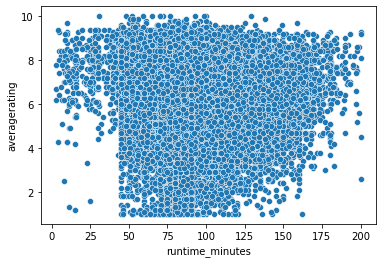

In [118]:
#[ANSWER FROM EXERCISE]

sns.scatterplot(data=low_length, x='runtime_minutes', y='averagerating');

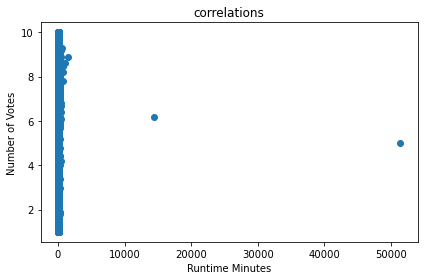

In [112]:
fig, ax = plt.subplots()

ax.scatter(df_combined['runtime_minutes'] , df_combined['averagerating'])
ax.set_xlabel('Runtime Minutes')
ax.set_ylabel('Number of Votes')
ax.set_title('correlations')

plt.tight_layout()

In [16]:
df_combined.shape

(73856, 8)

In [17]:
df_combined.duplicated().value_counts()

False    73856
dtype: int64

In [49]:
c

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [18]:
df_combined.groupby('genres')['averagerating'].mean().sort_values().tail(30)

genres
Documentary,Drama,Thriller       8.133333
Comedy,Family,Western            8.150000
Documentary,Family,Romance       8.160000
Animation,Documentary,Mystery    8.200000
Romance,Thriller,War             8.200000
Musical,Mystery,Sci-Fi           8.200000
Animation,Crime,Mystery          8.200000
Comedy,Musical,Western           8.200000
Adventure,Romance,Sci-Fi         8.300000
Biography,Family,History         8.300000
Comedy,History,Musical           8.300000
Documentary,Fantasy,Mystery      8.300000
Documentary,Music,War            8.300000
Animation,Documentary,Family     8.320000
Mystery,News,Thriller            8.400000
Music,Musical,Romance            8.400000
Biography,History,Music          8.500000
Comedy,Documentary,Sci-Fi        8.500000
Adventure,Crime                  8.500000
Action,Adventure,Musical         8.700000
Documentary,News,Reality-TV      8.800000
Drama,Short                      8.800000
Comedy,Drama,Reality-TV          8.800000
Drama,Fantasy,War          

In [19]:
movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [64]:
movie_gross['studio'].value_counts().head(20)

IFC       166
Uni.      147
WB        140
Magn.     136
Fox       136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: studio, dtype: int64

In [20]:
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [21]:
movie_gross.groupby('studio')['domestic_gross'].mean().head(20)

studio
3D           6.100000e+06
A23          8.210000e+04
A24          6.616208e+06
ADC          1.241000e+05
AF           3.571500e+05
AGF          1.580000e+04
ALP          2.800000e+03
AM           2.370000e+05
AR           3.500000e+05
ATO          3.733750e+05
AZ           1.160000e+05
AaF          1.400000e+06
Abk.         2.940000e+05
Abr.         6.122300e+05
Affirm       1.170000e+07
Alc          2.041400e+05
Amazon       3.442857e+06
Ampl.        4.550600e+05
Anch.        7.204167e+05
Annapurna    1.436667e+07
Name: domestic_gross, dtype: float64

In [22]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
movie_gross.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [24]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [25]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***